In [27]:
import tensorflow as tf
#tf.__version__
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#normalize data, makes it easier for a network to learn.
#makes all values between a new value between 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#image_size = 28*28
#x_train = x_train.reshape(x_train.shape[0],image_size)
#x_train = x_train.astype('float32')
#x_train /= 255

#x_test = x_test.reshape(x_test.shape[0],image_size)
#x_test = x_test.astype('float32')
#x_test /= 255

#print(x_train)

model = tf.keras.models.Sequential()
#input layer
model.add(tf.keras.layers.Flatten())
#hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))




model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

model.summary()


Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1077 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.9769
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_52 (Dense)             (32, 128)                 100480    
_________________________________________________________________
dense_53 (Dense)             (32, 128)                 16512     
_________________________________________________________________
dense_54 (Dense)             (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 792us/step - loss: 0.0868 - accuracy: 0.9727
0.0868128314614296 0.9726999998092651


In [26]:
import numpy as np

predictions = model.predict(x_test)

print(np.argmax(predictions[0]))

7


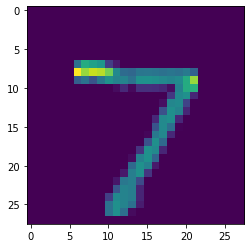

In [20]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])